<a href="https://colab.research.google.com/github/a0pro0b/Projects/blob/main/Copy_of_Copy_of_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install pydicom

     |████████████████████████████████| 2.0 MB 7.3 MB/s 


In [ ]:
from sklearn.cluster import KMeans
import pydicom as dicom
import os
import PIL
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Pre-Processing(not neccessery)

In [ ]:
file_path = "drive/MyDrive/RBL Paper(CPD)/Image/vhf.1000.dcm"
medical_image = dicom.read_file(file_path)
print(medical_image)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.75064541463040.2005072610414630768
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: Secondary Capture Image Storage
(0002, 0016) Source Application Entity Title     AE: 'GDCM'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20050726'
(0008, 0013) Instance Creation Time              TM: '104146'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.1.750

In [ ]:
image=medical_image.pixel_array
print(image.shape)

(512, 512)


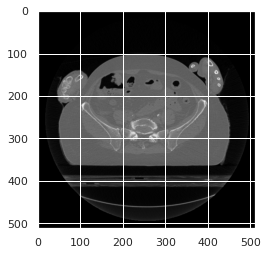

In [ ]:
plt.imshow(image, cmap='gray')


In [ ]:
print(image.min())
print(image.max())

0
2436


[[-2048. -2048. -2048. ... -2048. -2048. -2048.]
 [-2048. -2048. -2048. ... -2048. -2048. -2048.]
 [-2048. -2048. -2048. ... -2048. -2048. -2048.]
 ...
 [-2048. -2048. -2048. ... -2048. -2048. -2048.]
 [-2048. -2048. -2048. ... -2048. -2048. -2048.]
 [-2048. -2048. -2048. ... -2048. -2048. -2048.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


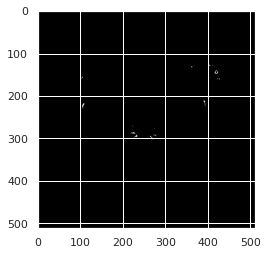

In [ ]:
#def transform_to_hu(medical_image, image):
intercept = medical_image.RescaleIntercept
slope = medical_image.RescaleSlope
hu_image = image * slope + intercept
print(hu_image)
plt.imshow(hu_image, cmap='gray')

    #return hu_image
#def window_image(image, window_center, window_width):
image=hu_image
window_center=40
window_width=80
img_min = window_center - window_width // 2
img_max = window_center + window_width // 2
window_image = image.copy()
window_image[window_image < img_min] = img_min
window_image[window_image > img_max] = img_max
print(window_image) 
plt.imshow(window_image, cmap='gray')
    #return window_image

In [ ]:
import cv2

In [ ]:
print(np.ones((1, 1)))

[[1.]]


In [ ]:
import scipy

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


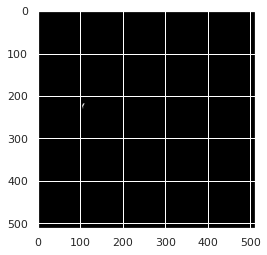

In [ ]:
#def remove_noise(file_path, display=True):
medical_image = dicom.read_file(file_path)
image = medical_image.pixel_array
    
#hu_image = transform_to_hu(medical_image, image)
#brain_image = window_image(hu_image, 40, 80) #bone windowing
brain_image = window_image   
#segmentation = cv2.morphologyEx.dilation(brain_image, np.ones((1, 1)))
#segmentation = morphology.dilation(brain_image, np.ones((1, 1)))
kernal=np.ones((1, 1), np.uint8)
seg1=cv2.morphologyEx(brain_image, cv2.MORPH_CLOSE, kernal, iterations = 2)
segmentation = cv2.dilate(seg1, kernal)
labels, label_nb = scipy.ndimage.label(segmentation)
    
label_count = np.bincount(labels.ravel().astype(np.int))
label_count[0] = 0

mask = labels == label_count.argmax()
print(mask) 
kernal=np.ones((1, 1))
#mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal, iterations = 2)
#mask=cv2.dilate(mask, kernal)
#mask = ndimage.cv2.morphologyEx.binary_fill_holes(mask)
#mask = cv2.morphologyEx.dilation(mask, np.ones((3, 3)))
masked_image = mask * brain_image
print(masked_image)
plt.imshow(masked_image, cmap='gray')
#    return masked_image

In [ ]:
print(remove_noise(file_path))

AttributeError: ignored

In [ ]:
img=np.uint8 (iskemiMaskedImg)
contours, hier =cv2.findContours (img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask=numpy.zeros (img.shape, numpy.uint8)

# find the biggest contour (c) by the area
c = max(contours, key = cv2.contourArea)

(x,y),(MA,ma),angle = cv2.fitEllipse(c)

cv2.ellipse(img, ((x,y), (MA,ma), angle), color=(0, 255, 0), thickness=2)

rmajor = max(MA,ma)/2
if angle > 90:
    angle -= 90
else:
    angle += 96
xtop = x + math.cos(math.radians(angle))*rmajor
ytop = y + math.sin(math.radians(angle))*rmajor
xbot = x + math.cos(math.radians(angle+180))*rmajor
ybot = y + math.sin(math.radians(angle+180))*rmajor
cv2.line(img, (int(xtop),int(ytop)), (int(xbot),int(ybot)), (0, 255, 0), 3)

pylab.imshow(img)
pylab.show()

M = cv2.getRotationMatrix2D((x, y), angle-90, 1)  #transformation matrix

img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]), cv2.INTER_CUBIC)

pylab.imshow(img)
pylab.show()

NameError: ignored

End of pre-processing(not neccessary)

In [ ]:
dicom_image_description = pd.read_csv("/content/drive/MyDrive/RBL Paper(CPD)/dicom_image_description.csv")

#folder_path = "drive/MyDrive/image_test"
folder_path = "drive/MyDrive/RBL Paper(CPD)/Image"
images_path = os.listdir(folder_path)

with open('Patient_Detail.csv', 'w', newline ='') as csvfile:
    fieldnames = list(dicom_image_description["Description"])
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(fieldnames)
    aa=[]
    aaa=[]#this is for cnn
    for n, image in enumerate(images_path):
        #print((n))
        ds = dicom.dcmread(os.path.join(folder_path, image))
        #print("********************************************************************************************")
        #print(image)
        #print(ds)
        #print("********************************************************************************************")
        #print(ds.PixelData[:200])
        #np.set_printoptions(threshold=5, linewidth=120)
        np.set_printoptions(threshold=np.inf, linewidth=140)
        aa.append(ds.pixel_array.flatten())
        aaa.append(ds.pixel_array)#this is for cnn
        #np.savez_compressed('/content/drive/MyDrive/RBL Paper(CPD)/Pixel Array Compressed/data'+str(n)+'.npz', aaa)
        #data = data - np.min(data)
        #data = data / np.max(data)
        #data = (data * 255).astype(np.uint8)
        rows = []
        for field in fieldnames:
          if field!='PixelData':
            if ds.data_element(field) is None:
                rows.append('')
            else:
                x = str(ds.data_element(field)).replace("'", "")
                y = x.find(":")
                x = x[y+2:]
                rows.append(x)
          else:
            rows.append('/content/drive/MyDrive/RBL Paper(CPD)/Pixel Array Compressed/data'+str(n)+'.npz')
        writer.writerow(rows)


numpy_aaa=np.array(aaa)#used later for cnn


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


KeyboardInterrupt: ignored

In [ ]:
print(type(aa))

<class 'list'>


PCA

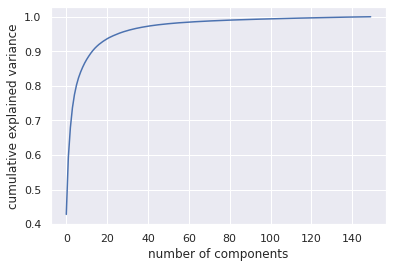


            0          1          2    ...        119       120       121
0   -64.498466 -35.542336  15.328655  ...  -3.582380 -2.493071 -0.376689
1    62.134457 -10.931434   9.075720  ...  10.891668  3.392102  8.993508
2   -27.982928  40.741976 -27.371394  ...   0.554672  2.331574  0.832949
3    34.708868  25.395773  40.250607  ...  -0.304515 -0.390519 -0.004809
4    38.121680  23.821683  37.021569  ...  -0.954059  1.830689 -0.863245
..         ...        ...        ...  ...        ...       ...       ...
145 -61.846246 -41.095997  24.221788  ...   6.834780  4.744330  3.829562
146 -21.740252  44.642391 -20.333576  ...   0.912013  0.683503  0.664222
147  59.735273  -6.077363  14.588991  ...  -0.432734  6.606967  3.572624
148  52.167043   5.987675  24.710602  ...  -0.926343  0.414481  2.839292
149  61.308331  -9.323316  10.949107  ...  -6.274854  1.198089 -6.414394

[150 rows x 122 columns]

Shape of PCA Matrix  (150, 122)


In [ ]:
pca = PCA().fit(aa)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.header
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance(%)')
plt.show()

#aa = StandardScaler().fit_transform(aa)
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(aa)
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)
df = pd.DataFrame(reduced)
print("\n",df)
print("\nShape of PCA Matrix ", df.shape)

Clustering

Cluster Labels:
 [3 2 1 0 0 0 2 0 2 3 2 2 3 0 1 3 2 0 1 3 2 3 0 2 3 2 0 2 1 3 1 0 1 2 1 2 3 2 2 1 3 2 3 2 3 3 2 1 3 2 3 2 1 3 3 1 0 3 0 2 3 0 1 0 1 3 0 3 2
 3 1 1 1 0 3 2 2 3 3 2 0 3 2 2 0 1 0 1 1 1 2 3 2 2 3 1 2 1 1 0 2 0 3 3 3 1 3 3 1 2 2 0 3 0 2 3 3 2 0 3 0 1 3 2 1 2 3 3 1 2 0 0 1 3 0 1 1 3
 0 1 1 2 1 1 2 3 1 2 0 2] 



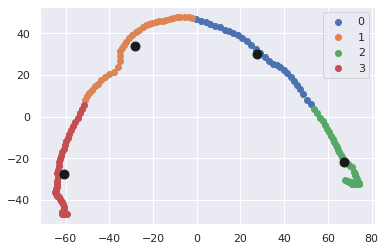

In [ ]:
kmeans = KMeans(n_clusters= 4)
#predict the labels of clusters.
labels = kmeans.fit_predict(df)
print("Cluster Labels:\n",labels,"\n")
label=pd.DataFrame(labels, columns=['Label'])

#filter rows of original data
#filtered_label0 = df[labels == 0]
#filtered_label1 = df[labels == 1]
#filtered_label2 = df[labels == 2] 
#filtered_label3 = df[labels == 3]
#print(type(filtered_label0))
#print(filtered_label0.keys())
#print(filtered_label0.iloc[:,0])
#Plotting the results
#plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
#plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
#plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'blue')
#plt.scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1] , color = 'green')
#plt.show()

#Getting unique labels and centroid
u_labels = np.unique(labels)
centroids = kmeans.cluster_centers_ 
#plotting the results for all the labels:
for i in u_labels:
  filtered_label = df[labels == i]
  plt.scatter(filtered_label.iloc[:,0] , filtered_label.iloc[:,1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

[2, 14, 18, 28, 30, 32, 34, 39, 47, 52, 55, 62, 64, 70, 71, 72, 85, 87, 88, 89, 95, 97, 98, 105, 108, 121, 124, 128, 132, 135, 136, 139, 140, 142, 143, 146]


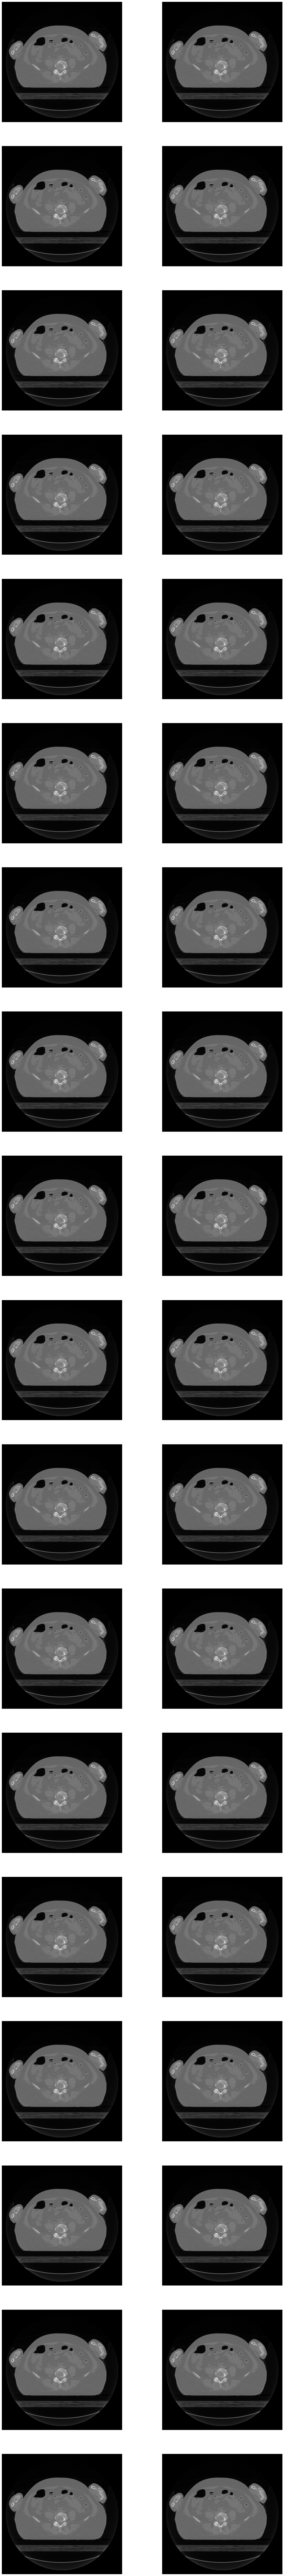

In [ ]:
indices = []
for i in range(len(labels)):
   if labels[i] == 1:
      indices.append(i)
print(indices)
#indices=[1,2,3,4,5,6,7,8]
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,200))

fig.autolayout='True'

rows = 20
columns = 2
j=1
for i in indices:
  #plt.subplot(121)
  #plt.legend()
  #print(j)
  fig.add_subplot(rows, columns, j)
  j=j+1
  plt.imshow(numpy_aaa[0,:,:], cmap='gray', extent=[-4, 4, -1, 1], aspect=4)
  plt.axis('off')
  #plt.title("Ground Truth : {}".format(labels[0]))
#plt.imshow(numpy_aaa[0,:,:], cmap='gray')
#plt.imshow(numpy_aaa[1,:,:], cmap='gray')


Logistic Regression

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=1,random_state=100)
#df,label=sm.fit_sample(df,label.ravel())
#sm.fit(x_test,y_test)
df,label=sm.fit_resample(df,label.values.ravel())
print(df.shape)
print(label.shape)
print(type(df))

(172, 122)
(172,)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,label,test_size=0.25, random_state=2)
a1=a2=a3=a4=a5=a6=a7=a8=a9=one=x_train
b1=b2=b3=b4=b5=b6=b7=b8=b9=two=x_test
c1=c2=c3=c4=c5=c6=c7=c8=c9=three=y_train
d1=d2=d3=d4=d5=d6=d7=d8=d9=four=y_test
a1.shape,b1.shape,c1.shape,d1.shape

((129, 122), (43, 122), (129,), (43,))

In [ ]:
l=np.unique(y_train)
l

array([0, 1, 2, 3], dtype=int32)

In [ ]:
ll=np.unique(y_test)
ll

array([0, 1, 2, 3], dtype=int32)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((129, 122), (129,), (43, 122), (43,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
fold=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
fold.get_n_splits(x_train,y_train)

5

In [ ]:
val=list(np.arange(0.001,1,0.1))

In [ ]:
parameters={"solver":("newton-cg","liblinear"),"C":val}

In [ ]:
model=LogisticRegression(penalty='l2',n_jobs=-2,max_iter=1000)
log_res=GridSearchCV(model,parameters,n_jobs=-2,cv=fold)

In [ ]:
log_res.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, n_jobs=-2), n_jobs=-2,
             param_grid={'C': [0.001, 0.101, 0.201, 0.30100000000000005, 0.401,
                               0.501, 0.6010000000000001, 0.7010000000000001,
                               0.801, 0.901],
                         'solver': ('newton-cg', 'liblinear')})

In [ ]:
print(log_res.best_params_)

{'C': 0.001, 'solver': 'newton-cg'}


In [ ]:
y_pred_log_res=log_res.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred_log_res))
ac=accuracy_score(y_test,y_pred_log_res)
print(ac*100)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      1.00      1.00        10
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00         9

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43

97.67441860465115


In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((129, 122), (129,), (43, 122), (43,))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(one, three)

RandomForestClassifier(n_estimators=1000)

In [ ]:
y_pred_rf= rf.predict(two)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(four, y_pred_rf))
ac=accuracy_score(four,y_pred_rf)
print(ac*100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         9

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

100.0


KNN

In [ ]:
x_train=a1
x_test=b1
y_train=c1
y_test=d1
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((129, 122), (129,), (43, 122), (43,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import fbeta_score,make_scorer
#fscorer=make_scorer(fbeta_score,beta=1)
params={'n_neighbors':range(3,10)}
knn=KNeighborsClassifier(algorithm='brute')
knn_grid=GridSearchCV(knn,params,cv=fold,n_jobs=-2)
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(algorithm='brute'), n_jobs=-2,
             param_grid={'n_neighbors': range(3, 10)})

In [ ]:
print(knn_grid.best_params_)

{'n_neighbors': 3}


In [ ]:
y_pred_knn_grid=knn_grid.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred_knn_grid))
ac=accuracy_score(y_test,y_pred_knn_grid)
print(ac*100)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12
           3       1.00      0.89      0.94         9

    accuracy                           0.98        43
   macro avg       0.98      0.97      0.98        43
weighted avg       0.98      0.98      0.98        43

97.67441860465115


APPLY BERNOULLI/GUASSIAN NAIVE BAYES

In [ ]:
x_train=a2
x_test=b2
y_train=c2
y_test=d2
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((129, 122), (129,), (43, 122), (43,))

In [ ]:
from sklearn.naive_bayes import BernoulliNB
NB_Comp=BernoulliNB()
NB_Comp.fit(x_train,y_train)
y_pred_NBComp=NB_Comp.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred_NBComp))
ac=accuracy_score(y_test,y_pred_NBComp)
print(ac*100)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.73      0.80      0.76        10
           2       0.69      0.75      0.72        12
           3       0.88      0.78      0.82         9

    accuracy                           0.81        43
   macro avg       0.82      0.81      0.82        43
weighted avg       0.82      0.81      0.82        43

81.3953488372093


In [ ]:
x_train=a3
x_test=b3
y_train=c3
y_test=d3
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((129, 122), (129,), (43, 122), (43,))

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_Comp=GaussianNB()
NB_Comp.fit(x_train,y_train)
y_pred_NBComp=NB_Comp.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred_NBComp))
ac=accuracy_score(y_test,y_pred_NBComp)
print(ac*100)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       1.00      1.00      1.00        10
           2       0.92      0.92      0.92        12
           3       0.90      1.00      0.95         9

    accuracy                           0.93        43
   macro avg       0.93      0.94      0.93        43
weighted avg       0.93      0.93      0.93        43

93.02325581395348


APPLY DECISION TREE MODEL

In [ ]:
x_train=a4
x_test=b4
y_train=c4
y_test=d4
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((129, 122), (129,), (43, 122), (43,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train,y_train)
y_pred_dt=dtree.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred_dt))
ac=accuracy_score(y_test,y_pred_dt)
print(ac*100)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      1.00      1.00        10
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00         9

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43

97.67441860465115


Yet to complete...check parent class

APPLY SVM

In [ ]:
x_train=a5
x_test=b5
y_train=c5
y_test=d5
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((129, 122), (129,), (43, 122), (43,))

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1.0, random_state=1, kernel='linear')
svc.fit(x_train, y_train)
y_predict = svc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_predict))
ac=accuracy_score(y_test,y_predict)
print(ac*100)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      1.00      1.00        10
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00         9

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43

97.67441860465115


APPLY LOGISTIC REGRESSION WITH RANDOM FOREST

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# It is important to train the ensemble of trees on a different subset of the training 
#data than the linear regression model to avoid overfitting, in particular 
#if the total number of leaves is similar to the number of training samples
x_train=a6
x_test=b6
y_train=c6
y_test=d6
x_train, X_train_lr, ytrain, y_train_lr = train_test_split(x_train, y_train, test_size=0.60, shuffle = True)

rf = RandomForestClassifier(n_estimators=1000)
#train Random forest on a set of samples
rf.fit(x_train, ytrain)

#one hot encoder of the leaves
rf_enc = OneHotEncoder()

#for these leaves of RF, fit the one hot encoder
rf_enc.fit(rf.apply(x_train))

OneHotEncoder()

In [ ]:
f = rf_enc.transform(rf.apply(X_train_lr))
f.shape

(78, 9600)

In [ ]:
fold = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
fold.get_n_splits(X_train_lr, y_train_lr)

parameters = {'solver':('liblinear', 'sag'), 'C':[0.001]}

model = LogisticRegression(penalty='l2', n_jobs = -2, max_iter=1000)
rf_lr = GridSearchCV(model, parameters, n_jobs= -2, cv=fold)

rf_lr.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

print(rf_lr.best_params_)

{'C': 0.001, 'solver': 'liblinear'}


In [ ]:
y_pred_rf= rf_lr.predict(rf_enc.transform(rf.apply(x_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))
ac=accuracy_score(y_test, y_pred_rf)
print(ac*100)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         9

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

100.0


APPLY RANDOM FOREST ON KNN

In [ ]:
x_train=a7
x_test=b7
y_train=c7
y_test=d7
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((123, 5), (123,), (41, 5), (41,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
rf_enc=OneHotEncoder()
knnmodel=KNeighborsClassifier(algorithm='brute')
params={'n_neighbors':range(3,10)}
knn_grid=GridSearchCV(knnmodel,params,cv=fold,n_jobs=-2)
rf_enc.fit(rf.apply(x_train))
knn_grid.fit(knn_grid.transform(rf.apply(x_train)), y_train)
#knn_grid.fit(rf.apply(x_train), y_train)
print(knn_grid.best_params_)

AttributeError: ignored

In [ ]:
y_pred_knn= knn_grid.predict(rf_enc.transform(rf.apply(x_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

ValueError: ignored

APPLY NEURAL NETWORK

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop, Adamax, Adagrad, Nadam
import keras.backend as K

In [ ]:
model = Sequential()
model.add(Dense(30, input_shape = (14,), activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "softmax"))
model.compile(optimizer='Nadam',   metrics = ["accuracy"], loss='categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                450       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 804
Trainable params: 804
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(df.shape)
print(type(label))
print(label.shape)
df1=df.to_numpy()
#label1=label.to_numpy()

(164, 5)
<class 'numpy.ndarray'>
(164,)


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                450       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 804
Trainable params: 804
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train=a8
x_test=b8
y_train=c8
y_test=d8
batch_size = 64
epochs = 20
num_classes = 10
fashion_train = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Epoch 1/20


ValueError: ignored

In [ ]:
from keras.utils.np_utils import to_categorical
y_cat = to_categorical(df1)
model.fit(x=label, y=y_cat, verbose=0, epochs=100)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(two)
y_test_class = np.argmax(y_pred,axis=1)
l=[]
for i in range(0,94):
  l.append(int(four[i]))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, l))

In [ ]:
train_X=x_train
test_X=x_test
train_Y=y_train
test_Y=y_test
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [ ]:
train_X = train_X.reshape(-1, 144, 1)
test_X = test_X.reshape(-1, 144, 1)
train_X.shape, test_X.shape

In [ ]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(144),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])

In [ ]:
fashion_model.summary()

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

In [ ]:
fashion_train = fashion_model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

CN

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
#label.columns = [''] * len(df.columns)
#label = label[:]
#label.to_numpy()
#kmeans = KMeans(n_clusters= 4)
#predict the labels of clusters.
print(numpy_aaa.shape)
#labels = kmeans.fit_predict(numpy_aaa)
print(labels)
print(len(labels))


(150, 512, 512)
[2 3 0 1 1 1 3 1 3 2 3 3 2 1 0 2 3 1 0 2 3 2 1 3 2 3 1 3 0 0 0 1 0 3 0 3 2 3 3 0 2 3 2 3 2 2 1 0 2 3 2 3 1 0 0 0 1 2 1 3 0 1 0 1 0 2 1 0 3
 2 0 0 0 1 2 3 3 2 2 3 1 0 3 3 1 0 1 0 0 0 3 2 3 3 2 0 3 0 0 1 3 1 2 2 2 0 2 2 0 3 3 1 2 1 3 2 2 3 1 2 1 0 2 3 0 3 0 2 0 3 1 1 0 2 1 0 0 2
 1 0 0 3 0 1 3 2 0 3 1 3]
150


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(numpy_aaa, labels, test_size=0.25, random_state=42)
#X_train=a9.to_numpy()
#df1=df.to_numpy()
#print(type(d9))
#X_test=b9.to_numpy()
#Y_train=c9
#Y_test=d9
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

#(X_train,y_train) , (X_test,y_test)=mnist.load_data()
print('number of dimensions :', X_test.ndim)
#print((X_test[0]))
#print((X_test[0][20]))
print("--------------------------------------------------")
#print((X_test[0]))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
 
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255
#print(X_test[0][20])
print("--------------------------------------------------")
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

print(y_test)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
number of dimensions : 3
--------------------------------------------------
(112, 512, 512)
(38, 512, 512)
(112,)
(38,)
(112, 512, 512, 1)
(38, 512, 512, 1)
(112,)
(38,)
--------------------------------------------------
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[1 0 1 2 3 1 0 3 3 3 3 2 2 2 2 1 2 2 0 0 0 2 1 0 1 2 0 1 2 0 1 2 2 3 2 0 3 3]


In [ ]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(512,512,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
4/4 [==============================] - 27s 5s/step - loss: 248.1404 - accuracy: 0.1429
Epoch 2/20
4/4 [==============================] - 21s 5s/step - loss: 201.0899 - accuracy: 0.5536
Epoch 3/20
4/4 [==============================] - 19s 5s/step - loss: 150.7848 - accuracy: 0.5804
Epoch 4/20
4/4 [==============================] - 20s 5s/step - loss: 42.2810 - accuracy: 0.5179
Epoch 5/20
4/4 [==============================] - 21s 5s/step - loss: 16.0115 - accuracy: 0.6607
Epoch 6/20
4/4 [==============================] - 20s 5s/step - loss: 8.8810 - accuracy: 0.7321
Epoch 7/20
4/4 [==============================] - 20s 5s/step - loss: 1.1560 - accuracy: 0.9554
Epoch 8/20
4/4 [==============================] - 21s 5s/step - loss: 1.6947 - accuracy: 0.9196
Epoch 9/20
4/4 [==============================] - 23s 5s/step - loss: 0.9855 - accuracy: 0.9464
Epoch 10/20
4/4 [==============================] - 21s 5s/step - loss: 1.0772 - accuracy: 0.9375
Epoch 11/20
4/4 [==============

In [ ]:
#evaluting the model
#print(X_test[0][20])
print(y_test)
model.evaluate(X_test,y_test)

[1 0 1 2 3 1 0 3 3 3 3 2 2 2 2 1 2 2 0 0 0 2 1 0 1 2 0 1 2 0 1 2 2 3 2 0 3 3]
2/2 [==============================] - 3s 318ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

another process

In [ ]:
from sklearn.model_selection import train_test_split
(train_X,test_X,train_Y,test_Y) = train_test_split(numpy_aaa, labels, test_size=0.25, random_state=42)

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (112, 512, 512) (112,)
Testing data shape :  (38, 512, 512) (38,)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  4
Output classes :  [0 1 2 3]


Text(0.5, 1.0, 'Ground Truth : 0')

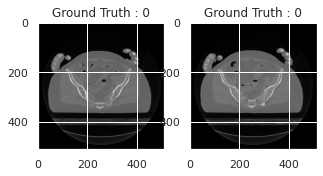

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


Text(0.5, 1.0, 'Ground Truth : 0')

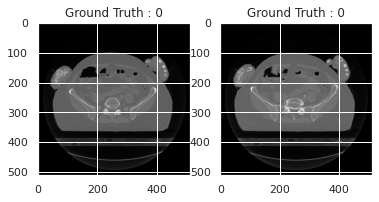

In [ ]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Text(0.5, 1.0, 'Ground Truth : 0')

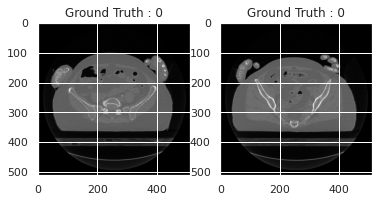

In [ ]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[2,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[2,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Ground Truth : 0')

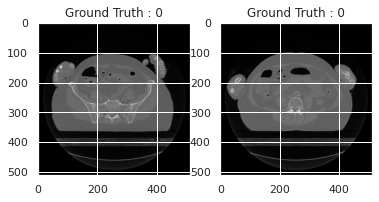

In [ ]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[4,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[4,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[3,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[3,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [ ]:
train_X = train_X.reshape(-1, 512,512, 1)
test_X = test_X.reshape(-1, 512,512, 1)
train_X.shape, test_X.shape

((112, 512, 512, 1), (38, 512, 512, 1))

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0.]


In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((89, 512, 512, 1), (23, 512, 512, 1), (89, 4), (23, 4))

In [ ]:
pip install numpy tensorflow pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import tensorflow
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
batch_size = 64
epochs = 20
num_classes = 4

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(512,512,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#with drop out to reduce over fitting
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512, 512, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256, 256, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                    

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
2/2 [==============================] - 61s 17s/step - loss: 0.0372 - accuracy: 0.9888 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 51s 17s/step - loss: 0.0388 - accuracy: 0.9775 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 51s 17s/step - loss: 0.0463 - accuracy: 0.9888 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 51s 17s/step - loss: 0.0408 - accuracy: 0.9888 - val_loss: 0.0396 - val_accuracy: 0.9565
Epoch 5/20
2/2 [==============================] - 51s 17s/step - loss: 0.0288 - accuracy: 0.9888 - val_loss: 0.0456 - val_accuracy: 0.9565
Epoch 6/20
2/2 [==============================] - 50s 17s/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.0370 - val_accuracy: 0.9565
Epoch 7/20
2/2 [==============================] - 54s 17s/step - loss: 0.0226 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 8/20
2/2 [===========

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
print(fashion_train.history)

Test loss: 0.004212576430290937
Test accuracy: 1.0
{'loss': [0.037226587533950806, 0.038758132606744766, 0.0462636724114418, 0.040794748812913895, 0.028777386993169785, 0.02047315612435341, 0.02255924418568611, 0.020544322207570076, 0.01925584487617016, 0.01787818968296051, 0.015324107371270657, 0.013958985917270184, 0.014241714030504227, 0.013634995557367802, 0.014287897385656834, 0.011806074529886246, 0.011373990215361118, 0.011319171637296677, 0.01045586820691824, 0.011673349887132645], 'accuracy': [0.9887640476226807, 0.9775280952453613, 0.9887640476226807, 0.9887640476226807, 0.9887640476226807, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.011953474022448063, 0.014242484234273434, 0.024945251643657684, 0.03961454704403877, 0.04561588913202286, 0.03700840473175049, 0.025197014212608337, 0.01822398416697979, 0.022492142394185066, 0.028928332030773163, 0.02738308347761631, 0.021877149119973183, 0.020222267135977745, 0.02342096157371998, 0

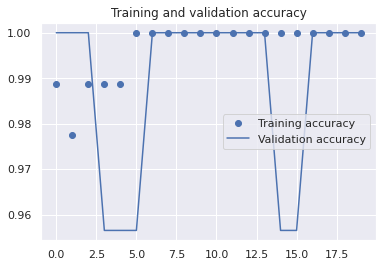

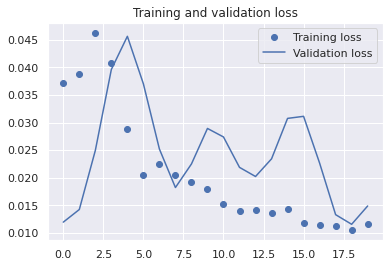

In [ ]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()